# #STOCK PRICE PREDICTION

# Problem Statement:

-To predict the future stock price of any company.                                                                                 
-To predict the profit and loss which it gained in a year and predict the future price of the stock.

# 1) Importing mandatory Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)  #to get all the rows and columns 
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2) Load and Read the Dataset

In [2]:
stock = pd.read_csv(r"C:\Users\home\Desktop\MedTour\Stock Price\stock.csv")

In [3]:
stock.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


There are multiple variables in the dataset – date, open, high, low, last, close and turnover.

 - The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
 - High, Low and Last represent the maximum, minimum, and last price of the share for the day.
 - Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing

 - The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

# 3) EDA

## #Checking shape(i.e number of rows and columns)

In [4]:
stock.shape

(4392, 7)

In [5]:
stock.info() #Information i.e name , number of non nulls and datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 223.1+ KB


In [6]:
stock.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


## #Check null counts

In [7]:
stock.isnull().sum() #no null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

## #Deleting unnecessary column from dataframe

In [8]:
stock.drop(["Adj_Close"] , axis = 1 ,inplace = True)

In [9]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,7931600


## 3.1) DataTransformation

In [10]:
#as we can see from info that Date column is of object datatype so we have to convert it into "Datetime" datatype

In [11]:
stock["Date"] = pd.to_datetime(stock["Date"])
stock["Day_Of_Week"] = stock["Date"].dt.dayofweek #Here we are extracting Day from the Date column

In [12]:
stock.head()

,Date,Open,High,Low,Close,Volume,Day_Of_Week
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,3675600,0
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,1077600,1
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,437200,2
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,1883600,3
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,7931600,4


### #Create dummy variables

In [13]:
dum = pd.get_dummies(stock["Day_Of_Week"] , drop_first = True , prefix = "Day_Of_Week")

In [14]:
dum.head()

,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


## #Adding these dummy variables to existing dataframe

In [15]:
stock =pd.concat([stock,dum],axis =1)
stock.head()

,Date,Open,High,Low,Close,Volume,Day_Of_Week,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,3675600,0,0,0,0,0
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,1077600,1,1,0,0,0
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,437200,2,0,1,0,0
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,1883600,3,0,0,1,0
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,7931600,4,0,0,0,1


## 3.2) Data Cleaning

In [16]:
stock.drop(["Date" ,"Volume" ,"Day_Of_Week"] , axis= 1 ,inplace = True)

In [17]:
stock.head()

,Open,High,Low,Close,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4
0,3.812500,4.156250,3.812500,4.125000,0,0,0,0
1,4.125000,4.125000,4.000000,4.015625,1,0,0,0
2,4.000000,4.031250,3.953125,4.000000,0,1,0,0
3,4.000000,4.000000,3.843750,3.843750,0,0,1,0
4,3.734375,3.734375,3.390625,3.390625,0,0,0,1


In [18]:
stock.shape

(4392, 8)

## 3.3) Removing Outliers

### Before

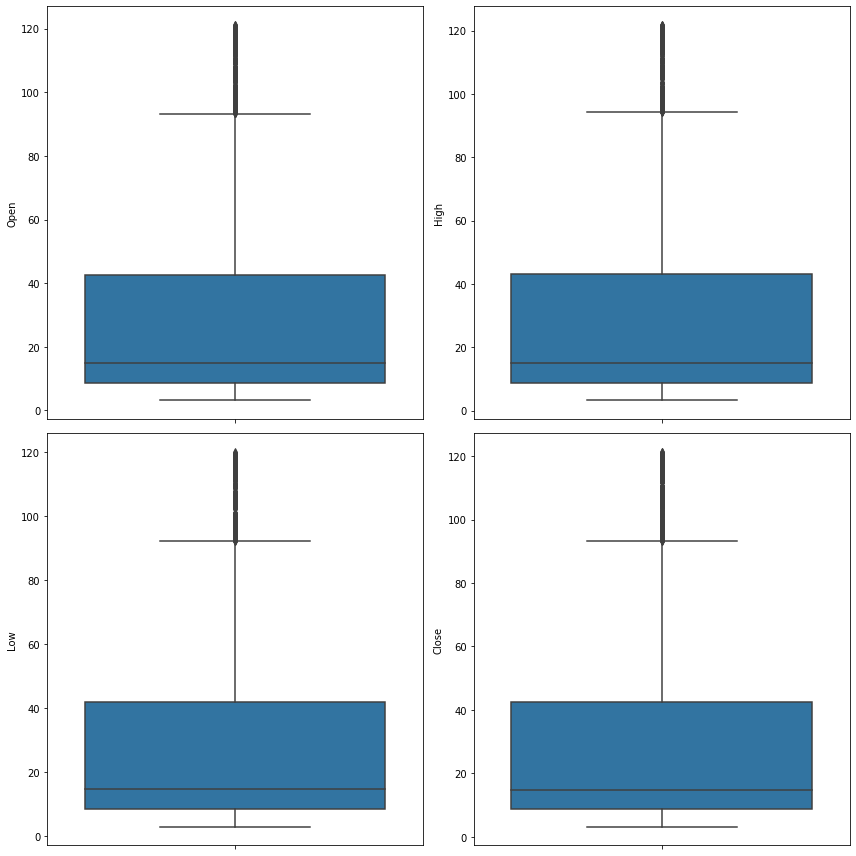

In [19]:
plt.figure(figsize=(12,12))
plot_number = 1

for cols in stock.columns:
    if plot_number < 5:
        ax = plt.subplot(2 ,2 , plot_number)
        sns.boxplot(y = stock[cols])
    plot_number += 1
plt.tight_layout()
        

In [20]:
stock.drop(stock[stock["Close"] > 70 ].index,inplace = True)

In [21]:
stock.shape

(3821, 8)

### After

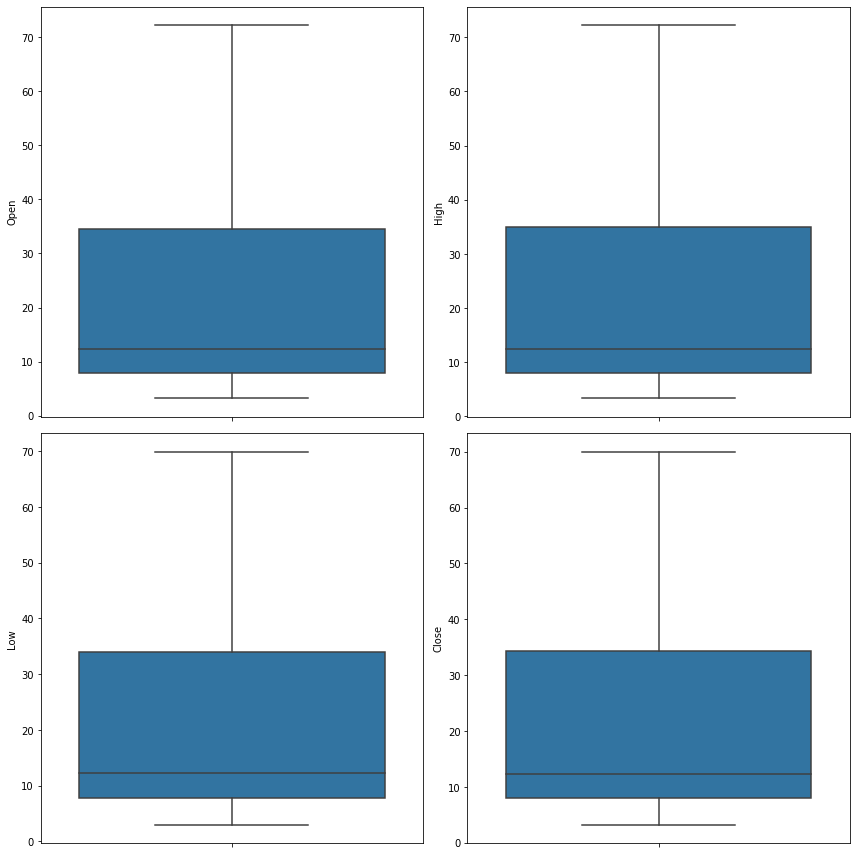

In [22]:
plt.figure(figsize=(12,12))
plot_number = 1

for cols in stock.columns:
    if plot_number < 5:
        ax = plt.subplot(2 ,2 , plot_number)
        sns.boxplot(y = stock[cols])
    plot_number += 1
plt.tight_layout()
        

## 3.4) Data Visualization

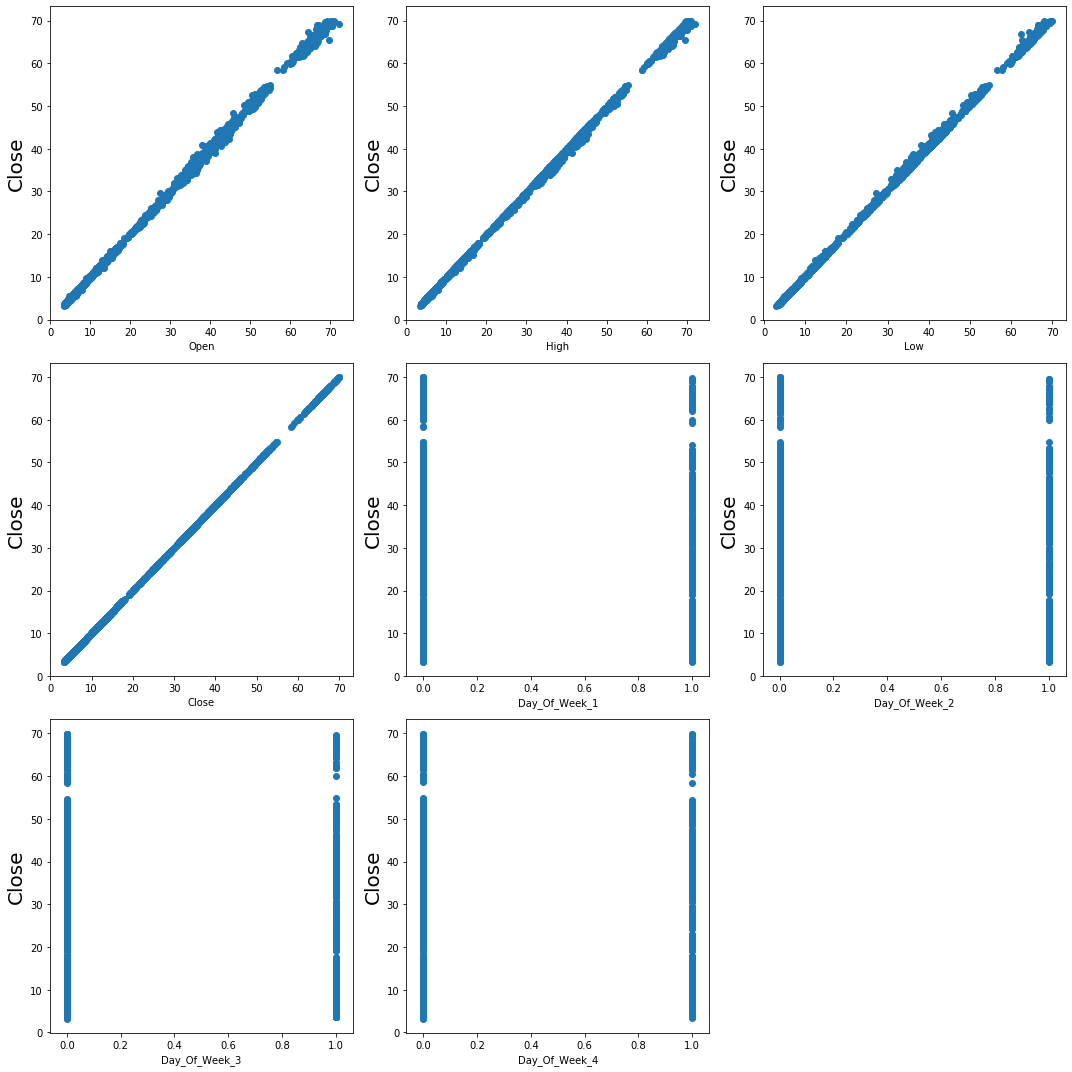

In [23]:
plt.figure(figsize=(15,15))
plot_number = 1

for cols in stock.columns:
    if plot_number <= 8:
        ax = plt.subplot(3 ,3 , plot_number)
        plt.scatter(x = stock[cols] , y = stock["Close"])
        plt.xlabel( cols ,fontsize = 10)
        plt.ylabel("Close" , fontsize = 20)
    plot_number += 1
plt.tight_layout()
        

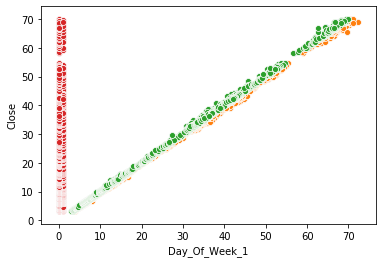

In [24]:
sns.scatterplot(x = "Open" , y = "Close" , data = stock)
sns.scatterplot(x = "High" , y = "Close" , data = stock)
sns.scatterplot(x = "Low" , y = "Close" , data = stock)
sns.scatterplot(x = "Day_Of_Week_1" , y = "Close" , data = stock)

# 4) Splitting X and Y

In [25]:
stock.head()

,Open,High,Low,Close,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4
0,3.812500,4.156250,3.812500,4.125000,0,0,0,0
1,4.125000,4.125000,4.000000,4.015625,1,0,0,0
2,4.000000,4.031250,3.953125,4.000000,0,1,0,0
3,4.000000,4.000000,3.843750,3.843750,0,0,1,0
4,3.734375,3.734375,3.390625,3.390625,0,0,0,1


In [26]:
X = stock.iloc[:, stock.columns!="Close"]
Y = stock.iloc[:, stock.columns=="Close"]

In [27]:
X.head(1)

,Open,High,Low,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4
0,3.8125,4.15625,3.8125,0,0,0,0


In [28]:
Y.head(1)

,Close
0,4.125


# 5) Train- Test split 

In [29]:
from sklearn.model_selection import train_test_split

In [44]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.3 , random_state = 79 )

# 6) Model Building 

# using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()

### #Fitting the model

In [47]:
reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### #Prediction

In [48]:
pred_value = reg.predict(X_test)

In [49]:
pred_value

array([[12.31385872],
       [42.95965809],
       [10.12842949],
       ...,
       [ 5.3230614 ],
       [ 6.90050144],
       [12.53712158]])

### #Score

In [50]:
reg.score(X_train , Y_train)

0.9998702032112387

# 7) Model Evaluation

In [51]:
reg.score(X_test , Y_test)

0.9999046489256462

In [52]:
from sklearn.metrics import r2_score
score = r2_score(pred_value , Y_test)
score

0.9999047304407532

### #Errors

In [53]:
from sklearn import metrics

In [54]:
MAE = metrics.mean_absolute_error(Y_test , pred_value)
MSE = metrics.mean_squared_error(Y_test , pred_value )
RMSE = pow(MSE , .5)

In [55]:
print("MAE",MAE,"\n", "MSE", MSE,"\n", "RMSE", RMSE)

MAE 0.10214487878965736 
 MSE 0.02623593523839567 
 RMSE 0.16197510684792177


In [56]:
#stock.to_csv(r"C:\Users\home\New_stock_price.csv" , index = False)